# ANOVA Analisi della varianza

## La scelta tra fertilizzanti proposti dal fornitore

Un azienda di fertilizzanti ha sviluppato tre nuovi tipi di fertilizzanti universali e, dopo aver eseguito delle ricerche scientifiche, affermano che possono essere tranquillamente utilizzati allo stesso modo per la crescita di qualisasi tipo di raccolto. Dichiara quindi che non fa differenza l'acquisto di uno piuttosto che l'altro e che quindi propone di vendere il fertilizzante n°2 con uno sconto del 10%.

A garanzia di quello che dichara, ci viene fornito un file che rappresenta i dati di sei differenti raccolti espressi in g/m^2 per ogni tipo di fertilizzante utilizzato. Dobbiamo stabilire con un livello di significatività dello 0.05 se la media dei raccolti per i tre tipi di fertilizzanti è effettivamente la stessa come affermato dal fornitore. Cioè che non fa differenza acquistare l'uno piuttosto che l'altro e che quindi il fertilizzante n°2 con uno sconto del 10%, possa essere un buon affare.

In [2]:
# comincio con inizializzare le librerie e importare il file
library(RCurl)  # prende il file dal link
library(ggplot2)

fer_file <- getURL("https://raw.githubusercontent.com/LorenzoNegri/Investigazioni-Statistiche-Fornitori/master/ANOVA%20Analisi%20della%20varianza/fertilizers.csv")
fer <- read.csv(text = fer_file)

In [3]:
fer

fertilizer1,fertilizer2,fertilizer3
<int>,<int>,<int>
62,54,48
62,56,62
90,58,92
42,36,96
84,72,92
64,34,80


In [4]:
summary(fer)

  fertilizer1     fertilizer2     fertilizer3   
 Min.   :42.00   Min.   :34.00   Min.   :48.00  
 1st Qu.:62.00   1st Qu.:40.50   1st Qu.:66.50  
 Median :63.00   Median :55.00   Median :86.00  
 Mean   :67.33   Mean   :51.67   Mean   :78.33  
 3rd Qu.:79.00   3rd Qu.:57.50   3rd Qu.:92.00  
 Max.   :90.00   Max.   :72.00   Max.   :96.00  

A prima vista pare che vi siano delle differenze tra i fertilizzanti. Ma i dati sono pochi e le differenze potrebbero essere dovuto al caso.

## Analisi della varianza

Cerchiamo ora di capire se come dichiarato dal fornitore, i fertilizzanti sono efficaci allo stesso modo nel far crescere i raccolti di diverso tipo.  Ovvero che i dati hanno la stessa distribuzione stocastica, e che le differenze osservate tra i fertilizzanti siano dovute solo al caso. 

In [5]:
racc = c(t(as.matrix(fer))) # converto i dati del raccolo nel file in un vettore (solo i numeri)
f = c("fertilizzante_1", "fertilizzante_2", "fertilizzante_3") # creo i nomi dei coefficienti da assegnare al vettore
k = 3; n = 6 
fertil = gl(k, 1, n*k, factor(f)) # assegno i coefficienti fertilizzanti in base al numero di livelli 
livelli = gl(n, k, k*n) # genero i livelli corrispondenti ai 6 tipi di raccolto in base al numero di fattori
av = aov(racc ~ fertil + livelli) # 
summary(av)

            Df Sum Sq Mean Sq F value Pr(>F)  
fertil       2   2155  1077.6   4.959 0.0319 *
livelli      5   2239   447.8   2.061 0.1547  
Residuals   10   2173   217.3                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Il p-value del risultato del test(\*) è inferiore del livello di significatività da noi assegnato (0.05 = probabilmente significativo), si evince che possiamo rifiutare l'ipotesi che il fornitore abbia ragione e affermare che i fertilizzanti hanno una resa significativamente differente sulla crescita del raccolto:

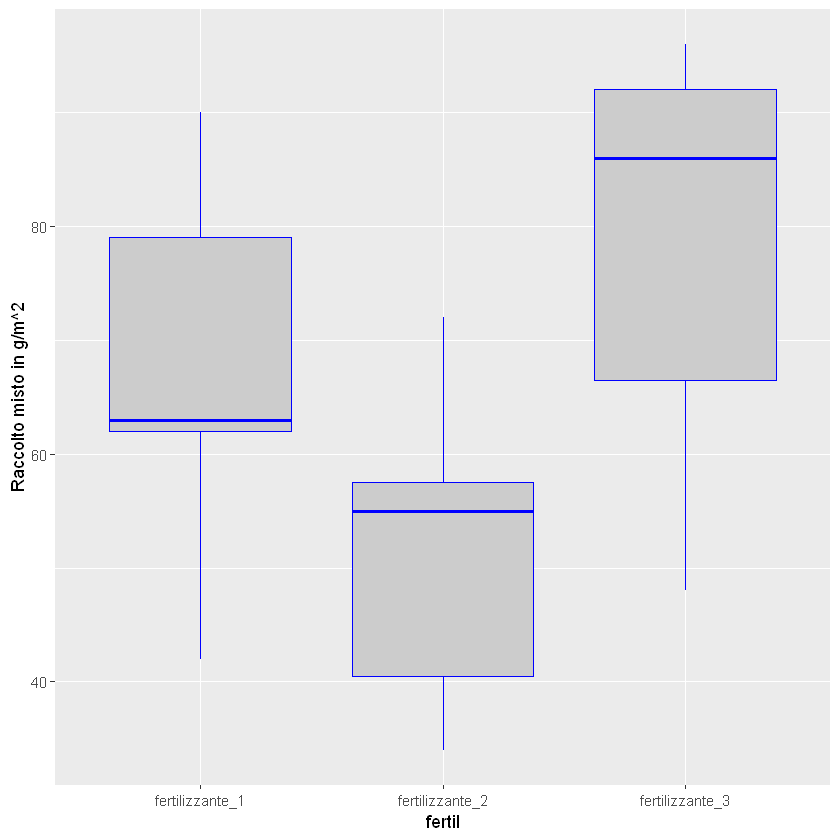

In [6]:
fer_.df <- data.frame(racc, fertil)
ggplot(fer_.df, aes(x = fertil, y = racc)) +
  geom_boxplot(fill = "grey80", colour = "blue") +
  scale_x_discrete() +
  ylab("Raccolto misto in g/m^2")

Dal grafico in alto possiamo vedere come la resa del fertilizzante n°2 sia nettamente inferiore agli altri due.

## Conclusioni

Per conlcudere si consiglia di rifiutare l'offerta del fornitore, oppure negoziare l'acquisto con uno sconto molto maggiore rispetto a quanto proposto.

In [7]:
library(psych) # per statistiche descrittive
s <- describe(fer) 


Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha



In [8]:
# calcolo la resa dei fertilizzanti secondo i dati forniti
resa_1 = ((s[1,3]+s[1,5])/2)
resa_2 = ((s[2,3]+s[2,5])/2)
resa_3 = ((s[3,3]+s[3,5])/2)

Se i fertilizzanti costano all'incirca allo stesso modo, il valore di sconto in base alla resa del fertilizzante n°2 rispetto a quello più performante n°3 lo calcoliamo così:

In [9]:
cat("lo sconto sull'acquisto deve essere superiore al :", round(1-(resa_2/resa_3),2)*100,"%")

lo sconto sull'acquisto deve essere superiore al : 35 %